#**ADMINISTRACION DEL DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**PREPARAMOS EL DATASET**

In [ ]:
import tensorflow as tf

train_path = "/content/drive/MyDrive/ASL/asl_alphabet_train/asl_alphabet_train"
test_path = "/content/drive/MyDrive/ASL/asl_alphabet_test/asl_alphabet_test"

batch_size = 64
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)



Found 39605 files belonging to 29 classes.
Found 28 files belonging to 29 classes.


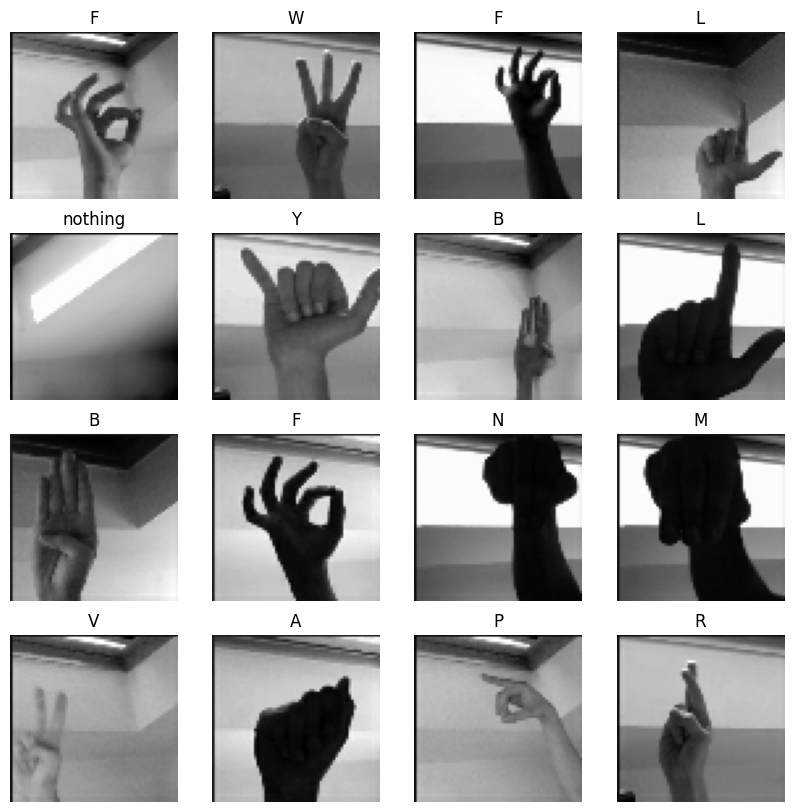

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Obtener una tanda (batch) de imágenes y etiquetas
class_names = train_ds.class_names

for images, labels in train_ds.take(1):  # tomar solo un batch
    plt.figure(figsize=(10, 10))
    for i in range(16):  # mostrar 16 imágenes
        ax = plt.subplot(4, 4, i + 1)

        # Convertir imagen a NumPy y luego a escala de grises
        img_np = images[i].numpy().astype("uint8")
        gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

        # Mostrar imagen en escala de grises
        plt.imshow(gray, cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
    break


In [ ]:
#Particionamos los datos en x (imagenes) e y (etiquetas)
x = [] #imagenes de entrada (pixeles)
y = [] #etiquetas de salida
total_procesadas = 0

for imagenes, etiquetas in train_ds:
    # Convertimos a arrays de numpy
    batch_imagenes = imagenes.numpy()
    batch_etiquetas = etiquetas.numpy()

    # Añadimos cada imagen y etiqueta individualmente
    for i in range(len(batch_imagenes)):
        x.append(batch_imagenes[i])
        y.append(batch_etiquetas[i])

    total_procesadas += len(batch_imagenes)
    print(f"Imágenes procesadas: {total_procesadas}")

Imágenes procesadas: 64
Imágenes procesadas: 128
Imágenes procesadas: 192
Imágenes procesadas: 256
Imágenes procesadas: 320
Imágenes procesadas: 384
Imágenes procesadas: 448
Imágenes procesadas: 512
Imágenes procesadas: 576
Imágenes procesadas: 640
Imágenes procesadas: 704
Imágenes procesadas: 768
Imágenes procesadas: 832
Imágenes procesadas: 896
Imágenes procesadas: 960
Imágenes procesadas: 1024
Imágenes procesadas: 1088
Imágenes procesadas: 1152
Imágenes procesadas: 1216
Imágenes procesadas: 1280
Imágenes procesadas: 1344
Imágenes procesadas: 1408
Imágenes procesadas: 1472
Imágenes procesadas: 1536
Imágenes procesadas: 1600
Imágenes procesadas: 1664
Imágenes procesadas: 1728
Imágenes procesadas: 1792
Imágenes procesadas: 1856
Imágenes procesadas: 1920
Imágenes procesadas: 1984
Imágenes procesadas: 2048
Imágenes procesadas: 2112
Imágenes procesadas: 2176
Imágenes procesadas: 2240
Imágenes procesadas: 2304
Imágenes procesadas: 2368
Imágenes procesadas: 2432
Imágenes procesadas: 2496
Im

In [ ]:
#Convertimos a arrays de numPy
x = np.array(x).astype(float)/255 #Normalizamos el vector
y = np.array(y)


#**MODELOS DE REDES CONVOLUCIONALES**

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

# Modelo normal  (datos tal y cmomo estan)
modeloCNN = tf.keras.models.Sequential([
    # Primera capa convolucional
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # Segunda capa convolucional
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # Tercera capa convolucional
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # Cuarta capa convolucional
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    # Capas normales
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(29, activation='softmax')  # Softmax para multiclase
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modeloCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Si tus etiquetas son enteros
    metrics=['accuracy']
)

tensorboardCNN = TensorBoard(log_dir='logs/CNN')
modeloCNN.fit(x,y,
              validation_split=0.15,
              epochs=15,
              callbacks=[tensorboardCNN])

Epoch 1/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 493s 464ms/step - accuracy: 0.2731 - loss: 2.7225 - val_accuracy: 0.6403 - val_loss: 1.1993
Epoch 2/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 503s 466ms/step - accuracy: 0.8027 - loss: 0.5819 - val_accuracy: 0.8620 - val_loss: 0.4234
Epoch 3/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 498s 463ms/step - accuracy: 0.9168 - loss: 0.2619 - val_accuracy: 0.7686 - val_loss: 0.9599
Epoch 4/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 498s 459ms/step - accuracy: 0.9498 - loss: 0.1613 - val_accuracy: 0.9668 - val_loss: 0.1047
Epoch 5/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 499s 456ms/step - accuracy: 0.9568 - loss: 0.1475 - val_accuracy: 0.9086 - val_loss: 0.3655
Epoch 6/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 477s 454ms/step - accuracy: 0.9725 - loss: 0.0971 - val_accuracy: 0.9939 - val_loss: 0.0216
Epoch 7/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 507s 458ms/step - accuracy: 0.9765 - loss: 0.0903 - val_accuracy: 0.8970 - val_loss: 0.4699
Epoch 8/15
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 491s 448ms/step - ac

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

#**EVALUACIÓN DEL MODELO**

In [ ]:
# Particionamos los datos de prueba en x_test (imágenes) y y_test (etiquetas)
x_test = []  # imágenes de entrada (píxeles)
y_test = []  # etiquetas de salida
total_procesadas = 0

for imagenes, etiquetas in test_ds:
    # Convertimos a arrays de numpy
    batch_imagenes = imagenes.numpy()
    batch_etiquetas = etiquetas.numpy()

    # Añadimos cada imagen y etiqueta individualmente
    for i in range(len(batch_imagenes)):
        x_test.append(batch_imagenes[i])
        y_test.append(batch_etiquetas[i])

    total_procesadas += len(batch_imagenes)
    print(f"Imágenes procesadas: {total_procesadas}")

# Convertimos a arrays de NumPy y normalizamos
x_test = np.array(x_test).astype(float)/255  # Normalizamos el vector
y_test = np.array(y_test)

# Ahora evaluamos el modelo con los datos preprocesados correctamente
test_loss, test_accuracy = modeloCNN.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

#**GUARDAMOS EL MODELO**

In [ ]:
modeloCNN.save('SILENT.h5')

In [ ]:
!pip install tensorflowjs

In [ ]:
!mkdir carpeta_salida

In [ ]:
!tensorflowjs_converter --input_format keras SILENT.h5 carpeta_salida